# Linear regression showing effects of sex, age, and sex*age on ICD connectivity

## A. Import Statements

In [1]:
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from scipy import stats
from statsmodels.graphics.api import abline_plot
# import warnings
# warnings.filterwarnings('ignore')

## B. RAVLT ICD GLM
### Load in demographic and ICD results of each subject

In [2]:
ravlt_icd_data = pd.read_csv('data/connectivity_ravlt.csv',sep = ',',skip_blank_lines = True)

master_icd_data = pd.DataFrame(columns = ['subj_id','sex','age','RAVLT Sum of Trials 1-5','Left PCC:Left AG Connectivity','Left PCC:Left PHG Connectivity'])
master_icd_data['subj_id'] = ravlt_icd_data['src_subject_id']
master_icd_data['sex'] = ravlt_icd_data['sex']
master_icd_data['age'] = ravlt_icd_data['interview_age']/12
master_icd_data['RAVLT Sum of Trials 1-5'] = ravlt_icd_data['ravlt_L']
master_icd_data['Left PCC:Left AG Connectivity'] = ravlt_icd_data['ROI28_Langulargyrus']
master_icd_data['Left PCC:Left PHG Connectivity'] = ravlt_icd_data['ROI9_Lmesialtemporal']

master_icd_data.set_index('subj_id',inplace=True)
master_icd_data = pd.get_dummies(master_icd_data, columns = ['sex'])
master_icd_data = master_icd_data.drop('sex_M', axis = 1)

master_icd_data['sex*age'] = master_icd_data['sex_F']*master_icd_data['age']

master_icd_data = sm.add_constant(master_icd_data)

master_icd_data = master_icd_data.dropna()
# master_icd_data = master_icd_data.drop(labels=['HCA9868920'], axis = 0)

# master_icd_data.head(60)


### Set independent and dependent variables for RAVLT vs. Left PCC:Left AG Connectivity

In [3]:
cols = ['Left PCC:Left AG Connectivity','sex_F','age','sex*age','const']
x = master_icd_data[cols]
y = master_icd_data[['RAVLT Sum of Trials 1-5']]

### GLM for RAVLT vs. Left PCC:Left AG Connectivity

In [4]:
ravlt_glm_1 = sm.GLM(y, x, family=sm.families.Gamma(sm.families.links.log())).fit()
ravlt_glm_1.summary()

/Users/sj737/opt/miniconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:777: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)
/Users/sj737/opt/miniconda3/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1767: RuntimeWarning: invalid value encountered in double_scalars
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                    
===================================================================================
Dep. Variable:     RAVLT Sum of Trials 1-5   No. Observations:                  509
Model:                                 GLM   Df Residuals:                      504
Model Family:                        Gamma   Df Model:                            4
Link Function:                         log   Scale:                        0.044062
Method:                               IRLS   Log-Likelihood:                    inf
Date:                     Mon, 17 Oct 2022   Deviance:                       92.133
Time:                             14:56:27   Pearson chi2:                     22.2
No. Iterations:                          9   Pseudo R-squ. (CS):                nan
Covariance Type:                 nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Left PCC:Left AG Connectivity     0.0759      0.190      0.400      0.689      -0.296       0.448
sex_F                            -0.0382      0.081     -0.471      0.638      -0.197       0.121
age                              -0.0063      0.001     -5.947      0.000      -0.008      -0.004
sex*age                           0.0022      0.001      1.569      0.117      -0.001       0.005
const                             4.1450      0.065     63.536      0.000       4.017       4.273
=================================================================================================
"""

### Set independent and dependent variables for RAVLT vs. Left PCC:Left PHG Connectivity

In [5]:
cols = ['Left PCC:Left PHG Connectivity','sex_F','age','sex*age','const']
x_2 = master_icd_data[cols]
y_2 = master_icd_data[['RAVLT Sum of Trials 1-5']]

### GLM for RAVLT vs. Left PCC:Left PHG Connectivity

In [6]:
ravlt_glm_2 = sm.GLM(y_2, x_2, family=sm.families.Gamma(sm.families.links.log())).fit()
ravlt_glm_2.summary()

/Users/sj737/opt/miniconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:777: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)
/Users/sj737/opt/miniconda3/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1767: RuntimeWarning: invalid value encountered in double_scalars
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                    
===================================================================================
Dep. Variable:     RAVLT Sum of Trials 1-5   No. Observations:                  509
Model:                                 GLM   Df Residuals:                      504
Model Family:                        Gamma   Df Model:                            4
Link Function:                         log   Scale:                        0.044063
Method:                               IRLS   Log-Likelihood:                    inf
Date:                     Mon, 17 Oct 2022   Deviance:                       92.132
Time:                             14:56:27   Pearson chi2:                     22.2
No. Iterations:                          8   Pseudo R-squ. (CS):                nan
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Left PCC:Left PHG Connectivity     0.1578      0.373      0.423      0.672      -0.573       0.889
sex_F                             -0.0385      0.081     -0.475      0.635      -0.197       0.120
age                               -0.0063      0.001     -5.965      0.000      -0.008      -0.004
sex*age                            0.0021      0.001      1.567      0.117      -0.001       0.005
const                              4.1480      0.064     64.976      0.000       4.023       4.273
==================================================================================================
"""

## C. Neuroticism ICD GLM
### Load in demographic and ICD results of each subject

In [7]:
neuro_icd_data = pd.read_csv('data/connectivity_personality_emotion.csv',sep = ',',skip_blank_lines = True)

master_n_icd_data = pd.DataFrame(columns = ['subj_id','sex','age','Neuroticism','Left PCC:Right STS Connectivity','Left PCC:Left Insula Connectivity'])
master_n_icd_data['subj_id'] = neuro_icd_data['src_subject_id']
master_n_icd_data['sex'] = neuro_icd_data['sex']
master_n_icd_data['age'] = neuro_icd_data['interview_age']/12
master_n_icd_data['Neuroticism'] = neuro_icd_data['Neuroticism']
master_n_icd_data['Left PCC:Right STS Connectivity'] = neuro_icd_data['ROI17_Rsuperiortemporal']
master_n_icd_data['Left PCC:Left Insula Connectivity'] = neuro_icd_data['ROI7_Linsula']

master_n_icd_data.set_index('subj_id',inplace=True)
master_n_icd_data = pd.get_dummies(master_n_icd_data, columns = ['sex'])
master_n_icd_data = master_n_icd_data.drop('sex_M', axis = 1)

master_n_icd_data['sex*age'] = master_n_icd_data['sex_F']*master_n_icd_data['age']

master_n_icd_data = sm.add_constant(master_n_icd_data)

master_n_icd_data = master_n_icd_data.dropna()

# master_n_icd_data.tail(60)


### Set independent and dependent variables for Neuroticism vs. Left PCC:Right STS Connectivity

In [8]:
cols = ['Left PCC:Right STS Connectivity','sex_F','age','sex*age','const']
x_1 = master_n_icd_data[cols]
y_1 = master_n_icd_data[['Neuroticism']]

### GLM for Neuroticism vs. Left PCC:Right STS Connectivity

In [9]:
neuro_glm_1 = sm.GLM(y_1, x_1, family=sm.families.Gamma(sm.families.links.log())).fit()
neuro_glm_1.summary()

/Users/sj737/opt/miniconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:777: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)
/Users/sj737/opt/miniconda3/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1767: RuntimeWarning: invalid value encountered in double_scalars
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Neuroticism   No. Observations:                  478
Model:                            GLM   Df Residuals:                      473
Model Family:                   Gamma   Df Model:                            4
Link Function:                    log   Scale:                         0.23421
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Mon, 17 Oct 2022   Deviance:                       346.10
Time:                        14:56:27   Pearson chi2:                     111.
No. Iterations:                    10   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Left PCC:Right STS Connectivity    -1.2071      0.512     -2.357      0.018      -2.211      -0.203
sex_F                              -0.7006      0.195     -3.586      0.000      -1.084      -0.318
age                                -0.0155      0.003     -6.002      0.000      -0.021      -0.010
sex*age                             0.0127      0.003      3.841      0.000       0.006       0.019
const                               3.5668      0.154     23.233      0.000       3.266       3.868
===================================================================================================
"""

### Set independent and dependent variables for Neuroticism vs. Left PCC:Left Insula Connectivity

In [10]:
cols = ['Left PCC:Left Insula Connectivity','sex_F','age','sex*age','const']
x_2 = master_n_icd_data[cols]
y_2 = master_n_icd_data[['Neuroticism']]

### GLM for Neuroticism vs. Left PCC:Left Insula Connectivity

In [11]:
neuro_glm_2 = sm.GLM(y_2, x_2, family=sm.families.Gamma(sm.families.links.log())).fit()
neuro_glm_2.summary()

/Users/sj737/opt/miniconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:777: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)
/Users/sj737/opt/miniconda3/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1767: RuntimeWarning: invalid value encountered in double_scalars
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Neuroticism   No. Observations:                  478
Model:                            GLM   Df Residuals:                      473
Model Family:                   Gamma   Df Model:                            4
Link Function:                    log   Scale:                         0.23596
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Mon, 17 Oct 2022   Deviance:                       347.40
Time:                        14:56:27   Pearson chi2:                     112.
No. Iterations:                    10   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Left PCC:Left Insula Connectivity    -0.9810      1.143     -0.858      0.391      -3.222       1.260
sex_F                                -0.6458      0.195     -3.306      0.001      -1.029      -0.263
age                                  -0.0159      0.003     -6.053      0.000      -0.021      -0.011
sex*age                               0.0124      0.003      3.750      0.000       0.006       0.019
const                                 3.5907      0.159     22.605      0.000       3.279       3.902
=====================================================================================================
"""

### Other GLM analyses

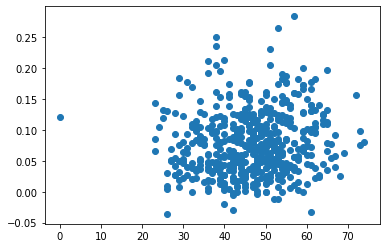

In [12]:
plt.scatter(master_icd_data['RAVLT Sum of Trials 1-5'],master_icd_data['Left PCC:Left AG Connectivity'])

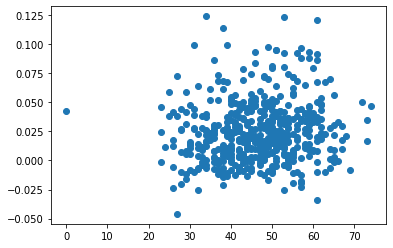

In [13]:
plt.scatter(master_icd_data['RAVLT Sum of Trials 1-5'],master_icd_data['Left PCC:Left PHG Connectivity'])

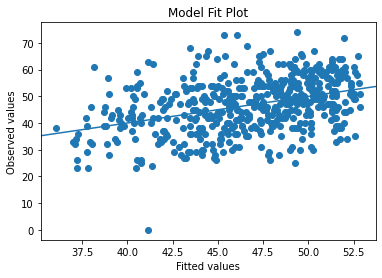

In [14]:
nobs = ravlt_glm_1.nobs
ytrue = y
yhat = ravlt_glm_1.mu
fig, ax = plt.subplots()
ax.scatter(yhat, ytrue)
line_fit = sm.OLS(ytrue, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)


ax.set_title('Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

In [15]:
rmse(master_icd_data['Left PCC:Left AG Connectivity'], ravlt_glm_1.predict(x))

46.68630514023185

In [16]:
ravlt_glm_1.aic

-inf

In [17]:
ravlt_glm_1.bic

/Users/sj737/opt/miniconda3/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


-3049.021184874983

In [18]:
ravlt_glm_1.null_deviance

95.55415311992489

In [19]:
ravlt_glm_1.deviance

92.13261546648036

In [20]:
# F test on the significance of model
def calculate_nested_f_statistic(small_model, big_model):
    """Given two fitted GLMs, the larger of which contains the parameter space of the smaller, return the F Stat and P value corresponding to the larger model adding explanatory power"""
    addtl_params = big_model.df_model - small_model.df_model
    f_stat = (small_model.deviance - big_model.deviance) / (addtl_params * big_model.scale)
    df_numerator = addtl_params
    # use fitted values to obtain n_obs from model object:
    df_denom = (big_model.fittedvalues.shape[0] - big_model.df_model)
    p_value = stats.f.sf(f_stat, df_numerator, df_denom)
    return (f_stat, p_value)

# Compuyte F statistics of the model 
big_model = ravlt_glm_1
# Drop one covariate (column):
smaller_model = sm.GLM(y, x['const'], family=sm.families.Gamma(sm.families.links.log())).fit()

# Using function defined in answer:
calculate_nested_f_statistic(smaller_model, big_model)

(19.413333761145058, 7.156767246787605e-15)

In [21]:
# compute Rsquare
sst = sum(map(lambda x: np.power(x,2),y-np.mean(y))) 
sse = sum(map(lambda x: np.power(x,2),ravlt_glm_1.resid_response)) 
r2 = 1.0 - sse/sst
r2

TypeError: ufunc 'power' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''